In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import tqdm
import copy
import gc
import sys
import os
import f90nml
import itertools

import bokeh
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, CDSView, GroupFilter, HoverTool
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral11

from bokeh.models.mappers import CategoricalColorMapper

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import scipy as sp
from scipy.sparse import linalg

import importlib

#%cd /data/lyna/Milestone_Error_Analysis_Testing
import analysis_functions_py2

In [2]:
##### read in datafile after removing false transition and checking convergence  ######
#dataDir='/data/yichun/nanotube_test/scripts'
#simDataDir='/'.join([dataDir,''])
#simDataFilename='Simulation_Milestone_Coordinate_Data.sphV2.9.2.csv'
simData=pd.read_csv('Simulation_Milestone_Coordinate_Data.allCyl.0.5ps.csv')

In [3]:
display(simData.head())
simData.tail()

,Window,Rep,Time,Frame,Rst00_X,Rst00_Y,Rst00_Z,lowerWall,upperWall,X_Index
0,0,1,1,1,-1.0301,3.7462,-26.1708,-28.0,-26.0,0
1,0,1,2,2,-3.0157,3.5203,-26.4763,-28.0,-26.0,0
2,0,1,3,3,-1.2288,4.1358,-26.2327,-28.0,-26.0,0
3,0,1,4,4,-1.5400,5.1812,-26.7008,-28.0,-26.0,0
4,0,1,5,5,-1.7573,4.7843,-26.3696,-28.0,-26.0,0


,Window,Rep,Time,Frame,Rst00_X,Rst00_Y,Rst00_Z,lowerWall,upperWall,X_Index
972361,27,1,1596,1596,1.7738,-2.3594,26.1002,26.0,28.0,27
972362,27,1,1597,1597,0.5421,-4.8347,27.0846,26.0,28.0,27
972363,27,1,1598,1598,1.2202,-6.2487,26.3756,26.0,28.0,27
972364,27,1,1599,1599,2.0024,-2.8590,27.4171,26.0,28.0,27
972365,27,1,1600,1600,1.8616,-3.0629,27.9973,26.0,28.0,27


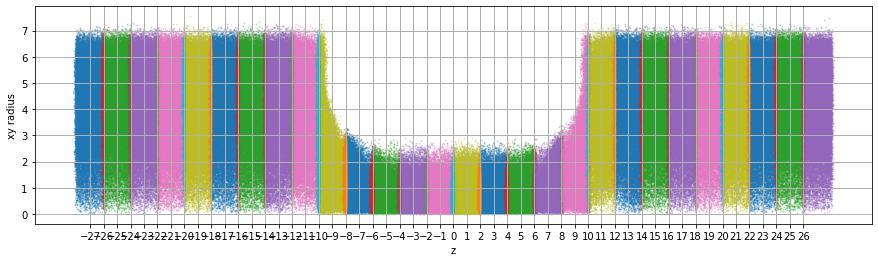

In [4]:
plt.figure(figsize=(15,4))
plotName=[]
plotData=[]
transitData=[]
centerData=[]

for group in simData.groupby('Window'):
    plotName,plotData=group
    transitData=plotData.query('Window != X_Index')
    centerData=plotData.query('Window ==X_Index')
    
    plt.scatter(x=centerData.Rst00_Z, y=((centerData.Rst00_X)**2+(centerData.Rst00_Y)**2)**0.5,s=1,alpha=0.25)
    plt.scatter(x=transitData.Rst00_Z, y=((transitData.Rst00_X)**2+(transitData.Rst00_Y)**2)**0.5,s=1,alpha=0.25)
plt.xlabel("z")
plt.ylabel("xy radius")
plt.xticks(np.arange(-27,27,1))
plt.grid( linestyle='-', linewidth=1)
plt.show()


In [24]:
# winCenter=np.arange(-9,10,2) # not sure how to define window center for spherical window with z width 10A
# print("pmf window center", winCenter,len(winCenter))
# cellwidth=2
# edge=(winCenter[1:]-0.5*cellwidth)[:-1]
# print("mfpt edge",edge, len(edge))


In [25]:
# display(AllcylData.head())
# AllcylData.tail()

In [26]:
# cylData=AllcylData.query("(Window>6)and(Window<21)")
# print(cylData.Window.unique())
# print(cylData.X_Index.unique())

#Truncate cylData to 10 windows only to match spherical boundary windows

In [27]:
# cylData["Window"]=cylData["Window"]-7
# cylData["X_Index"]=cylData["X_Index"]-7
# print(cylData.Window.unique())
# print(cylData.X_Index.unique())
# display(cylData.head())
# cylData.tail()

In [28]:
#sns.scatterplot(x=cylData.Window, y=cylData.X_Index)

In [29]:
# cylData.replace({'X_Index':14}, 13, inplace=True)
# cylData.replace({'X_Index':-1}, 0, inplace=True)
# print(cylData.Window.unique())
# print(cylData.X_Index.unique())
# sns.scatterplot(x=cylData.Window, y=cylData.X_Index)

In [5]:
########## use analysis_function.py to calculate Escape_vector and Reentry_vector #########
### for example, for window==50, Escape_Vector.unique() is [50 49 -1 51], Reentry_Vector.unique() is [-1 49 51]

simData['Frame']=simData['Time']
analysisFrame=analysis_functions_py2.add_indexed_milestoning_analysis_columns(
    simData,
    windowColumn='Window',xIndexColumn='X_Index',frameCol='Frame',
    repColumn='Rep',groupingColumn=None,verbose=True,verboseLevel=1)
analysisFrame.tail()


C:\Users\19094\Desktop\nanotube\analysis_functions_py2.py:424: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simData[groupingCol]=0
C:\Users\19094\Desktop\nanotube\analysis_functions_py2.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simData[repCol]=milestoneData[repCol]
C:\Users\19094\Desktop\nanotube\analysis_functions_py2.py:437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

--- --- --- Grouping Name: 0 --- --- ---
	binSet: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27] ; deltaVal: 1
	--- --- Window Name: 0 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 1 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 2 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 3 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 4 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 5 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 6 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 7 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 8 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 9 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 10 --- 

,Window,X_Index,Group,Rep,Frame,Escape_Vector,Reentry_Vector
2488692,27,27,0,1,9991500,27,26
2488693,27,27,0,1,9993500,27,26
2488694,27,27,0,1,9995500,27,26
2488695,27,27,0,1,9997500,27,26
2488696,27,27,0,1,9999500,27,26


In [7]:
############### Compute transition rate matrix ##################
#importlib.reload(analysis_functions)

binSet=np.sort(np.unique(np.concatenate([
    analysisFrame['Window'].unique(),
    analysisFrame['X_Index'].unique()
])))
print("binSet",binSet)

QdataDict=analysis_functions_py2.compute_analysis_group_Qdata(
    groupDataFrame=analysisFrame,windowColumn='Window',binSet=binSet,
                                     giveBins=False,giveBinMap=False,
                                     giveEscapeMat=True,giveCounts=False,
                                     giveCountsMat=False,givePiVec=True)
for entryKey in QdataDict:
    print(entryKey,':',QdataDict[entryKey])

binSet [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
Computing R and N: ( 0 : 1 ) ( 1 : 1 ) ( 2 : 1 ) ( 3 : 1 ) ( 4 : 1 ) ( 5 : 1 ) ( 6 : 1 ) ( 7 : 1 ) ( 8 : 1 ) ( 9 : 1 ) ( 10 : 1 ) ( 11 : 1 ) ( 12 : 1 ) ( 13 : 1 ) ( 14 : 1 ) ( 15 : 1 ) ( 16 : 1 ) ( 17 : 1 ) ( 18 : 1 ) ( 19 : 1 ) ( 20 : 1 ) ( 21 : 1 ) ( 22 : 1 ) ( 23 : 1 ) ( 24 : 1 ) ( 25 : 1 ) ( 26 : 1 ) ( 27 : 1 ) 
Rmat :   (0, 1)	1917.9135060802614
  (1, 0)	926.3149745926631
  (1, 2)	946.5526199718981
  (2, 1)	902.4131618369007
  (2, 3)	967.2917120846964
  (3, 2)	961.6535688391288
  (3, 4)	993.1188523242496
  (4, 3)	948.1139974849984
  (4, 5)	951.3283790875377
  (5, 4)	908.3199532456041
  (5, 6)	887.1595725178345
  (6, 5)	909.9678742331184
  (6, 7)	909.4134289776788
  (7, 6)	826.9110550741856
  (7, 8)	665.336954707456
  (8, 7)	656.9875809550616
  (8, 9)	155.52214447987654
  (9, 8)	121.31062693304709
  (9, 10)	12.926542214177147
  (10, 9)	10.14520886086047
  (10, 11)	1.1829699676528058
  (11,

Computing R and N: ( 0 : 1 ) ( 1 : 1 ) ( 2 : 1 ) ( 3 : 1 ) ( 4 : 1 ) ( 5 : 1 ) ( 6 : 1 ) ( 7 : 1 ) ( 8 : 1 ) ( 9 : 1 ) ( 10 : 1 ) ( 11 : 1 ) ( 12 : 1 ) ( 13 : 1 ) ( 14 : 1 ) ( 15 : 1 ) ( 16 : 1 ) ( 17 : 1 ) ( 18 : 1 ) ( 19 : 1 ) ( 20 : 1 ) ( 21 : 1 ) ( 22 : 1 ) ( 23 : 1 ) ( 24 : 1 ) ( 25 : 1 ) ( 26 : 1 ) ( 27 : 1 ) 
Rmat :   (0, 1)	1692.6055087508614
  (1, 0)	844.0569182936234
  (1, 2)	785.8669781268899
  (2, 1)	829.937603257589
  (2, 3)	886.8622149031963
  (3, 2)	840.0970186789968
  (3, 4)	829.1741076214788
  (4, 3)	830.5096110172823
  (4, 5)	761.0625212604691
  (5, 4)	829.2443258299056
  (5, 6)	825.3362195343362
  (6, 5)	891.7310131155201
  (6, 7)	748.0521310197397
  (7, 6)	732.2692638009244
  (7, 8)	634.7684669910227
  (8, 7)	562.1443204342249
  (8, 9)	134.54305763150398
  (9, 8)	99.63475873395547
  (9, 10)	11.256182585790206
  (10, 9)	9.714367152975626
  (10, 11)	1.2215873758637004
  (11, 10)	1.343662720443697
  (11, 12)	0.46288394681217654
  (12, 11)	0.6096720606794177
  (12, 13)	

In [12]:
# cellIndex=np.arange(0,10,1)
# print(cellIndex)
# edgeIndex=np.arange(1,9,1)
# print(edgeIndex)

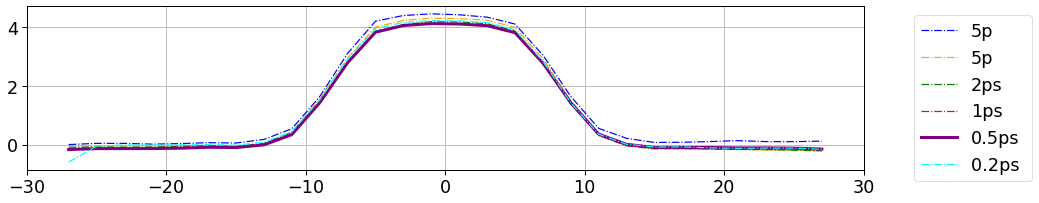

In [19]:
kb=0.001985875
Tsim=300
kbT=kb*Tsim

plt.figure(figsize=(15,3))
sns.set_context("paper",font_scale=2)
window_center=np.arange(-27,29,2)
# ###### PMF ###########
tempVec=-kbT*np.log(QdataDict['piVec']) #-log(piVec) is PMF in kT
tempVec=tempVec-np.min(tempVec)

#multi_index=np.arange(0,14)
#fig,ax1 = plt.subplots()
plt.grid()
plt.plot(window_center,tempVec,label='5p',color='blue',linestyle='-.')#972367frames
plt.xlim(-30,30)
#plt.ylabel('PMF (kcal/mol)')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [2]:
# mbar=pd.read_csv('mbar_data.csv')
# print (mbar.head())

wham_data_accum=pd.read_csv("mbar_data_s8.csv",delim_whitespace=True,header=None)
wham_data_accum = {'z_coor':wham_data_accum[0],'pmf':wham_data_accum[1],'sd':wham_data_accum[2]}
wham_data_accum=pd.DataFrame(wham_data_accum)
print (wham_data_accum)
wham_data_accum['pmf']=wham_data_accum['pmf'].rolling(window=30,min_periods=1).mean()

wham_5ps=pd.read_csv('mbar_data_s9.csv',delim_whitespace=True, header=None)
wham_5ps={'z_coor':wham_5ps[0],'pmf':wham_5ps[1],'sd':wham_5ps[2]}
wham_5ps=pd.DataFrame(wham_5ps)
print (wham_5ps)
wham_5ps['pmf']=wham_5ps['pmf'].rolling(window=30, min_periods=1).mean()

     z_coor       pmf        sd
0   -27.965  0.486349  0.240432
1   -27.895  1.054498  0.247094
2   -27.825  0.846819  0.240922
3   -27.755  0.747395  0.237786
4   -27.685  0.551239  0.234414
..      ...       ...       ...
795  27.685  0.705079  0.087861
796  27.755  0.789083  0.093695
797  27.825  0.847188  0.100165
798  27.895  0.946242  0.108783
799  27.965  0.989578  0.117009

[800 rows x 3 columns]
     z_coor       pmf        sd
0   -27.965  0.649697  0.248896
1   -27.895  1.024074  0.251633
2   -27.825  0.823582  0.246422
3   -27.755  0.846739  0.245156
4   -27.685  0.656146  0.241928
..      ...       ...       ...
795  27.685  0.439560  0.085272
796  27.755  0.577374  0.092356
797  27.825  0.690476  0.099994
798  27.895  0.896205  0.113391
799  27.965  0.837570  0.117268

[800 rows x 3 columns]


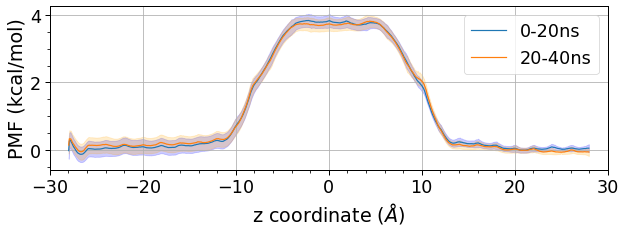

In [6]:
# mil_centers=np.arange(-27,29,2)
# plt.plot(mil_centers,new_400nsVec,marker="o", label='milestoning')
# #plt.plot(mbar.bin_center,mbar.f_i-0.5, label='mbar',marker="o")
plt.figure(figsize=(10,3))
sns.set_context("paper",font_scale=2)
plt.plot(wham_data_accum['z_coor'],wham_data_accum['pmf']-0.5,label='0-20ns')
plt.plot(wham_5ps['z_coor'], wham_5ps['pmf']-0.5, label='20-40ns')
plt.fill_between(wham_data_accum['z_coor'],wham_data_accum['pmf']-0.5-wham_data_accum['sd'],
               wham_data_accum['pmf']-0.5+wham_data_accum['sd'],color='blue',alpha=0.2)

plt.fill_between(wham_5ps['z_coor'],wham_5ps['pmf']-0.5-wham_5ps['sd'],
                wham_5ps['pmf']-0.5+wham_5ps['sd'],alpha=0.2,color='orange')


plt.xlim(-30,30)
# plt.fill_between(bin300['z_coor'],bin300['pmf']-bin300['sd'],
#                 bin300['pmf']+bin300['sd'],alpha=0.3)
# plt.fill_between(bin500['z_coor'],bin500['pmf']-bin500['sd'],
#                 bin500['pmf']+bin500['sd'],alpha=0.3)
#plt.title('Umbrella Sampling')
plt.xlabel('z coordinate ($\AA$)')
plt.ylabel('PMF (kcal/mol)')
plt.legend()
plt.minorticks_on()
plt.grid()

4.315579162360251


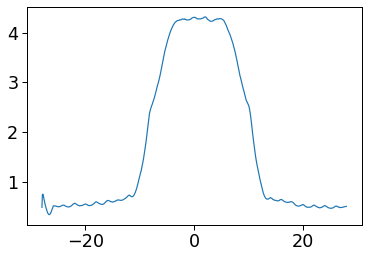

In [12]:
tt=pd.read_csv('mbar_data_all.csv',delim_whitespace=True, header=None)
tt.columns=['z','pmf','error']
tt['pmf']=tt['pmf'].rolling(window=30,min_periods=1).mean()
print (tt.pmf.max())
plt.plot(tt.z, tt.pmf)

In [61]:
#import analysis_functions 

In [6]:
#### reverse Window and X_Index for backward MFPT ########
revData=pd.read_csv('Simulation_Milestone_Coordinate_Data.allCyl.5ps.traj.csv')
revData.Window=27-revData.Window
revData.X_Index=27-revData.X_Index
revData.tail()

,Window,Rep,Time,Frame,Rst00_Z,XY_Radius,lowerWall,upperWall,X_Index
9954800,0,1,9997500,9997500,28.007697,1.573917,26.0,28.0,0
9954801,0,1,9998000,9998000,27.417047,1.898895,26.0,28.0,0
9954802,0,1,9998500,9998500,28.085497,2.174566,26.0,28.0,0
9954803,0,1,9999000,9999000,27.552025,2.642219,26.0,28.0,0
9954804,0,1,9999500,9999500,27.723778,3.388607,26.0,28.0,0


In [7]:
###### calucalate Escape_vector and Reentry_vector for backward transition #########
revData['Frame']=revData['Time']
rev_analysisFrame=analysis_functions_py2.add_indexed_milestoning_analysis_columns(
    revData,
    windowColumn='Window',xIndexColumn='X_Index',frameCol='Frame',
    repColumn='Rep',groupingColumn=None,verbose=True,verboseLevel=1)
rev_analysisFrame.tail()   

C:\Users\19094\Desktop\nanotube\analysis_functions_py2.py:424: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simData[groupingCol]=0
C:\Users\19094\Desktop\nanotube\analysis_functions_py2.py:434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simData[repCol]=milestoneData[repCol]
C:\Users\19094\Desktop\nanotube\analysis_functions_py2.py:437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

--- --- --- Grouping Name: 0 --- --- ---
	binSet: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27] ; deltaVal: 1
	--- --- Window Name: 0 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 1 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 2 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 3 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 4 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 5 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 6 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 7 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 8 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 9 --- ---
		--- Replica Name: 1 ---
	--- --- ------ --- ---
	--- --- Window Name: 10 --- 

,Window,X_Index,Group,Rep,Frame,Escape_Vector,Reentry_Vector
298485,27,27,0,1,4997500,27,26
298486,27,27,0,1,4998000,27,26
298487,27,27,0,1,4998500,27,26
298488,27,27,0,1,4999000,27,26
298489,27,27,0,1,4999500,27,26


In [8]:
kb=0.001985875 #kcal/mol
simTemp=300
kbT=kb*simTemp

# binSet_rev=np.sort(np.unique(np.concatenate([
#     rev_analysisFrame['Window'].unique(),
#     rev_analysisFrame['X_Index'].unique()
# ])))
# print ('binSet:', binSet_rev)
# # print("binSet",binSet_rev)
# rev_testEscapeData=analysis_functions_py2.compute_analysis_group_pi_vector(
#    groupDataFrame=rev_analysisFrame,windowColumn='Window',binSet=binSet_rev,
#    giveEscapeMat=True,giveCounts=True,giveBins=True,giveBinMap=True,
#    giveCountsMat=True)

# # piVec is the eigenvec of escapMat, whose eigenval is 1. Sum of piVec is 1
# # i.e. escapeEig=np.linalg.eig(escapeMat.todense().T), piVec=np.array(escapeEig[1])

binSet: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


In [9]:
################ Compute transition rate matrix for backward transition ############
rev_QdataDict=analysis_functions_py2.compute_analysis_group_Qdata(
   groupDataFrame=rev_analysisFrame,windowColumn='Window',binSet=binSet_rev,
                                    giveBins=False,giveBinMap=False,
                                    giveEscapeMat=True,giveCounts=False,
                                    giveCountsMat=False,givePiVec=True)

Computing R and N: ( 0 : 1 ) ( 1 : 1 ) ( 2 : 1 ) ( 3 : 1 ) ( 4 : 1 ) ( 5 : 1 ) ( 6 : 1 ) ( 7 : 1 ) ( 8 : 1 ) ( 9 : 1 ) ( 10 : 1 ) ( 11 : 1 ) ( 12 : 1 ) ( 13 : 1 ) ( 14 : 1 ) ( 15 : 1 ) ( 16 : 1 ) ( 17 : 1 ) ( 18 : 1 ) ( 19 : 1 ) ( 20 : 1 ) ( 21 : 1 ) ( 22 : 1 ) ( 23 : 1 ) ( 24 : 1 ) ( 25 : 1 ) ( 26 : 1 ) ( 27 : 1 ) 
Rmat :   (0, 1)	17986.104833998357
  (1, 0)	8860.69499483047
  (1, 2)	8912.591265295934
  (2, 1)	8878.615919165259
  (2, 3)	8669.75682041675
  (3, 2)	8756.412223620566
  (3, 4)	8771.776561479268
  (4, 3)	8557.560375672223
  (4, 5)	8569.88041844332
  (5, 4)	8719.646679043854
  (5, 6)	8337.370959808704
  (6, 5)	8744.746580669584
  (6, 7)	8220.233472084128
  (7, 6)	7613.1473413104995
  (7, 8)	6675.700156087795
  (8, 7)	5988.946037764974
  (8, 9)	2018.6109246988885
  (9, 8)	1161.78154819117
  (9, 10)	209.2149670815186
  (10, 9)	119.03804631856545
  (10, 11)	22.655722479034054
  (11, 10)	17.250259687217742
  (11, 12)	7.418533745535091
  (12, 11)	8.238237345791859
  (12, 13)	7.91

In [10]:
from matplotlib.pyplot import figure

[-25 -23 -21 -19 -17 -15 -13 -11  -9  -7  -5  -3  -1   1   3   5   7   9
  11  13  15  17  19  21  23  25]


<Figure size 720x216 with 0 Axes>

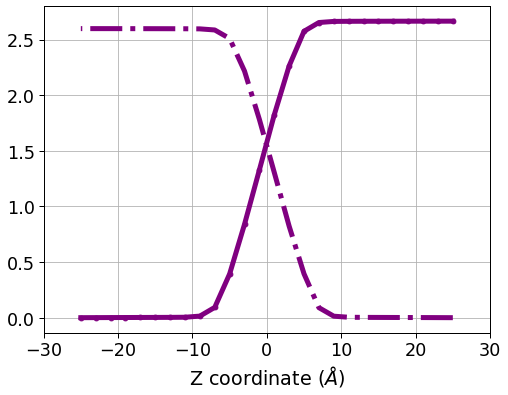

In [12]:
###### reverse MFPT ##########
plt.figure(figsize=(10,3))
sns.set_context("paper",font_scale=2)
# mil_center=np.arange(-26,26,2)
# rev_mil_center=[24,22,20,18,16,14,12,10,8,6,4,2,0,-2,-4,-6,-8,-10,-12,-14,-16,-18,-20,-22,-24,-26]
mil_center=np.arange(-25,27,2)
print (mil_center)
rev_mil_center=[25,23,21,19,17,15,13,11,9,7,5,3,1,-1,-3,-5,-7,-9,-11,-13,-15,-17,-19,-21,-23,-25]
figure(figsize=(8, 6))
tauVec=QdataDict['tauVec']

rev_tauVec=rev_QdataDict['tauVec']

frq=0.0005/1000 #frame rate in ns; 5ps/frame

x=[25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0]

plt.plot(mil_center,np.sort(tauVec-np.min(tauVec))*frq,marker="o",label='0.5ps',c='blue')
plt.plot(rev_mil_center,
    np.sort(rev_tauVec-np.min(rev_tauVec))*frq,c='blue',linestyle='-.')

plt.xlim(-30,30)
plt.xlabel('Z coordinate ($\AA$)')
#plt.ylabel('MFPT (ns)')
plt.grid(True)
#plt.legend(bbox_to_anchor=(1,1))
plt.show()
